# Model Calibration
## Why calibrate?
Calibration is the process of fine-tuning an agent-based model's input parameters so that its simulated outputs align with real-world data. Without calibration, the model might generate plausible-looking behavior that doesn’t actually reflect reality. Calibration improves the model’s credibility, predictive power, and policy relevance by ensuring it reproduces key observed patterns or outcomes from historical data.

## Calibration Process Overview
1. Define Calibration Targets:
Select measurable real-world data points (e.g., population size, disease prevalence, contraceptive use) that the model should replicate.

2. Identify Parameters to Tune:
Choose uncertain model parameters that strongly influence the outcomes but lack precise empirical estimates (e.g., agent behavior probabilities, environmental factors, etc.).

3. Choose a Calibration Method:
Use either:
- Manual/heuristic tuning (trial-and-error or expert knowledge), or
- Automated optimization (e.g., grid search, random search, genetic algorithms, or Bayesian methods) to systematically explore parameter space.

4. Define a Goodness-of-Fit Metric:
Quantify how well the model output matches the targets using metrics like root mean squared error (RMSE), likelihood scores, or custom error functions.

5. Run the Calibration:
Simulate the model repeatedly with different parameter values and evaluate performance using the fit metric.

6. Select Best-Fit Parameters:
Identify parameter sets that produce model outputs closest to observed data.

7. Validate (if possible):
Use separate data not involved in calibration to assess the model’s generalizability.

In this tutorial, we will walk through the basics of running both a manual and automated calibration. Choosing between manual and automated calibration depends on the model complexity, parameter uncertainty, available data, and computational resources. 

## Manual Calibration
Manual calibration involves adjusting parameters by hand based on expert knowledge or visual inspection of outputs. This can make sense when:
- The model has few parameters to tune
- You have strong domain knowledge about parameter ranges
- You are in the early stages of model development or prototyping
- The simulation is computationally expensive or you have limited computational resources
- You want to explore model behavior qualitatively

The plotting class (in plotting.py) can be used to visually inspect the outputs of common target parameters (e.g. CPR, method mix, TFR, etc.) and compare the model output vs real-world data.

## Automated Calibration
Automated calibration uses optimization algorithms (like Optuna’s Bayesian optimization) to efficiently search parameter space for the best fit. An automated calibration in FPsim uses the calibration and experiment classes to use Optuna's optimization methods to determine the best free parameters. This makes sense to use when:
- Your model has many uncertain parameters (e.g. 5+)
- You have access to compute resources to run many simulations (e.g. in parallel on a machine or VM with ample processing power, memory, and storage OR on a cloud computing platform)
- You have a large number of target parameters to which you want to calibrate with an unbiased approach
 
A hybrid approach can also be to start with a manual calibration to narrow down plausible ranges and understand model dynamics. Then switch to automated methods to fine-tune parameters and formalize the process. 

## Preparing the data

In order to run a calibration successfully, we need to ensure that the fpsim/locations directory contains a directory for the country being calibrated (i.e. 'fpsim/locations/kenya'). This directory should also contain:
- A model file (i.e. fpsim/locations/kenya/kenya.py)
- A data subdirectory with data for the desired calibration targets (see fpsim/locations/README.md for specific files and means of generating each), ideally with the most recently available comprehensive data to compare with the model output 

Ensure that the data in the aforementioned files are formatted in the same manner as those in `locations/kenya/data`.

## Running a Manual Calibration
### Imports
First, we import any needed packages.

In [1]:
import fpsim as fp
from fpsim import plotting as plt

Starsim 2.0.0 (2024-10-01) — © 2023-2024 by IDM
kenya module path: C:\Users\emilycl\Projects\fpsim\fpsim\locations\kenya\kenya.py
fpsim module path: C:\Users\emilycl\Projects\fpsim\fpsim\__init__.py


### Setting Parameters

First, we set up our parameters for the simulation(s) used for calibration, including the country name and any specific sim params, such as the population size and start/end year of the sim.

In [2]:
country = 'kenya'

pars = fp.pars(location=country)
pars['n_agents'] = 10_000  # Population size
pars['end_year'] = 2020  # 1960 - 2020 is the normal date range


Next we set our free parameters to initial values that we will iteratively tune to optimize the model outputs (to be as close as possible to real-world data). The free parameters below are used for tuning for the following targets parameters:
- fecundity_var_low, fecundity_var_high: 
- exposure_factor:
- spacing_pref:
- primary_infertility
- age-based exposure (modified in {country}.py):
- parity-based exposure (modified in {country}.py):

In [3]:
# Initial free parameters for calibration
pars['fecundity_var_low'] = 1
pars['fecundity_var_high'] = 1
pars['exposure_factor'] = 1

# Last free parameter, postpartum sexual activity correction or 'birth spacing preference'. Pulls values from {location}/data/birth_spacing_pref.csv by default
# Set all to 1 to reset. Option to use 'optimize-space-prefs.py' script in this directory to determine values
pars['spacing_pref']['preference'][:3] =  1  # Spacing of 0-6 months
pars['spacing_pref']['preference'][3:6] = 1  # Spacing of 9-15 months
pars['spacing_pref']['preference'][6:9] = 1  # Spacing of 18-24 months
pars['spacing_pref']['preference'][9:] =  1  # Spacing of 27-36 months

# Only other simulation free parameters are age-based exposure and parity-based exposure (which you can adjust manually in {country}.py) as well as primary_infertility (set to 0.05 by default)

### Running the Simulation

We run the simulation with the free parameters specified above:

In [4]:
# Run the sim
sim = fp.Sim(pars=pars) # By default, this uses the StandardChoice contraceptive module.. but we can modify this along with the contraceptive parameters which we will see below..
sim.run()

  Running 1960 of 2020 ( 0/721) (0.10 s)  ———————————————————— 0%
  Running 1961 of 2020 (12/721) (0.20 s)  ———————————————————— 2%
  Running 1962 of 2020 (24/721) (0.43 s)  ———————————————————— 3%
  Running 1963 of 2020 (36/721) (0.76 s)  •——————————————————— 5%
  Running 1964 of 2020 (48/721) (1.05 s)  •——————————————————— 7%
  Running 1965 of 2020 (60/721) (1.27 s)  •——————————————————— 8%
  Running 1966 of 2020 (72/721) (1.50 s)  ••—————————————————— 10%
  Running 1967 of 2020 (84/721) (1.70 s)  ••—————————————————— 12%
  Running 1968 of 2020 (96/721) (1.91 s)  ••—————————————————— 13%
  Running 1969 of 2020 (108/721) (2.13 s)  •••————————————————— 15%
  Running 1970 of 2020 (120/721) (2.39 s)  •••————————————————— 17%
  Running 1971 of 2020 (132/721) (2.62 s)  •••————————————————— 18%
  Running 1972 of 2020 (144/721) (2.89 s)  ••••———————————————— 20%
  Running 1973 of 2020 (156/721) (3.11 s)  ••••———————————————— 22%
  Running 1974 of 2020 (168/721) (3.33 s)  ••••————————————————

Sim(<no label>; n=10000; 1960-2020; results: b=5814 ☠=8319 pop=7039)

### Plotting the Target Parameters

Once the sim run completes, we plot the sim results and the target parameters (comparing the model results vs real-world data). 

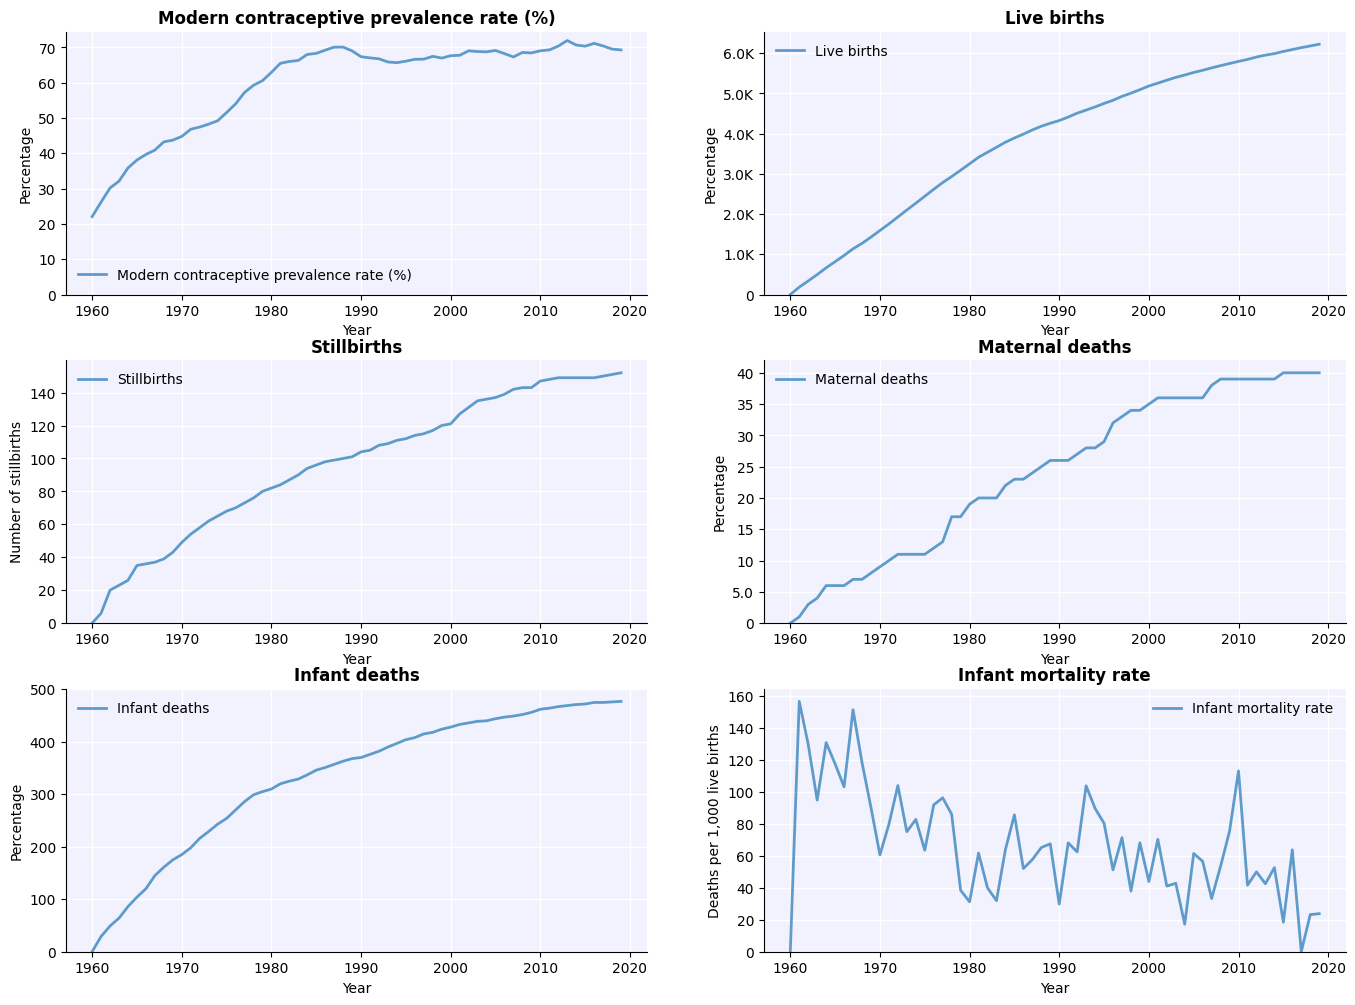

RMSE for method mix: 5.90
RMSE for overall use: 24.08


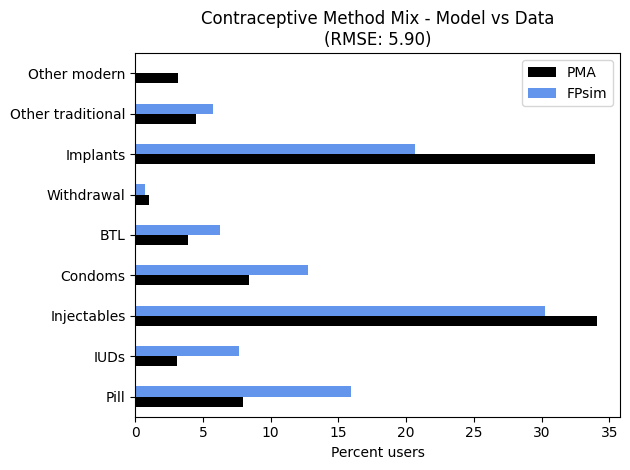

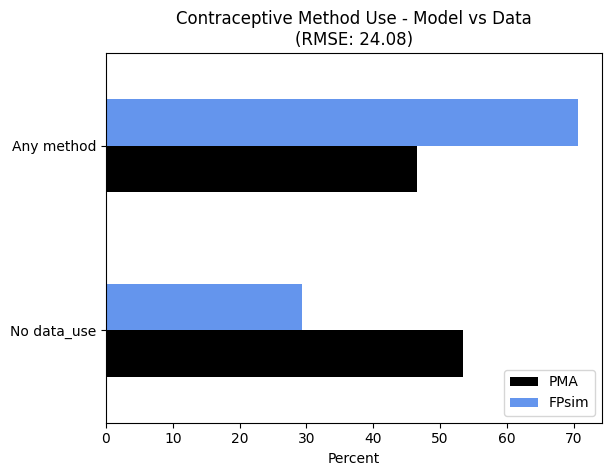

RMSE for CPR: 40.92


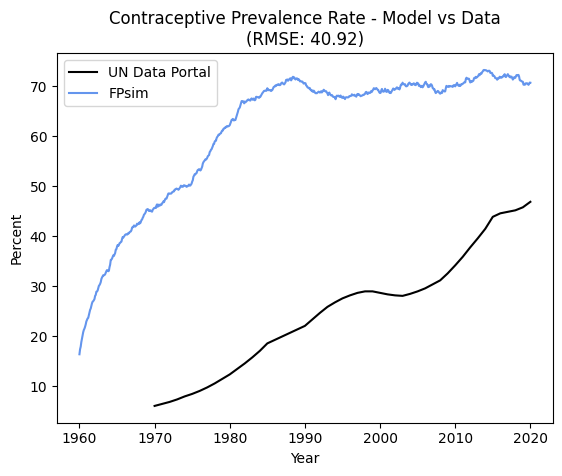

RMSE for Total Fertility Rate: 5.13


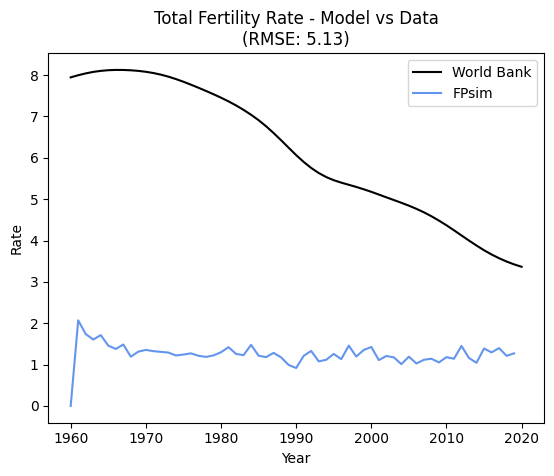

RMSE for Birth Spacing Bins: 12.30
Mean Age at First Birth - Model: 22.22, Data: inf
RMSE for Age at First Birth: inf


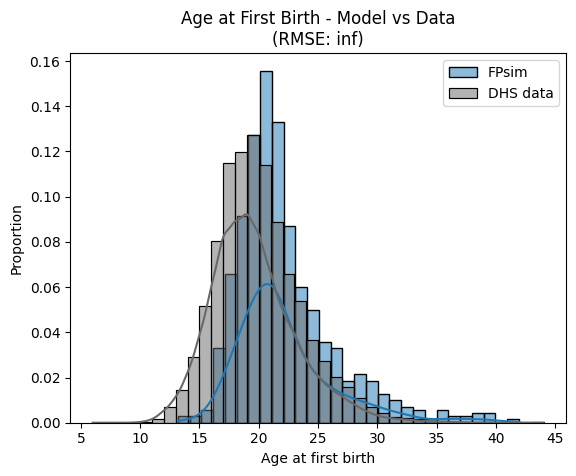

           Model       Data       Diff
0-12    5.479452   3.438400   2.041052
12-24  42.465753  26.117080  16.348673
24-48  29.452055  47.715358 -18.263303
>48    22.602740  22.729162  -0.126422


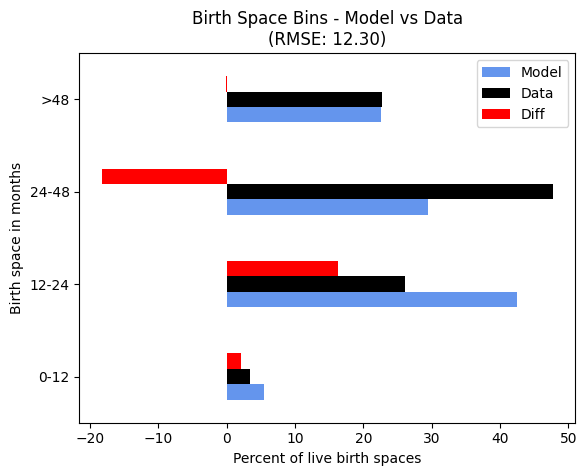

ASFR (annual) for age bin 10-14 in the last year of the sim: 0.0
ASFR (annual) for age bin 15-19 in the last year of the sim: 46.66666666666667
ASFR (annual) for age bin 20-24 in the last year of the sim: 112.5
ASFR (annual) for age bin 25-29 in the last year of the sim: 80.24691358024691
ASFR (annual) for age bin 30-34 in the last year of the sim: 0.0
ASFR (annual) for age bin 35-39 in the last year of the sim: 11.450381679389313
ASFR (annual) for age bin 40-44 in the last year of the sim: 3.3003300330033003
ASFR (annual) for age bin 45-49 in the last year of the sim: 0.0
ASFR RMSE between model and data: 68.18023944195122


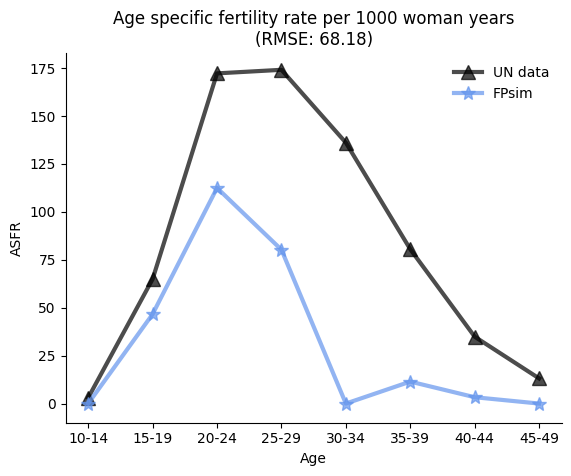

In [6]:
# Plot sim
sim.plot()

# Plotting class function which plots the primary calibration targets (method mix, method use, mcpr, total fertility rate, birth spacing, age at first birth, and age-specific fertility rate)
plt.plot_calib(sim)